In [1]:
%pylab inline
import io
import h5py 
import pandas as pd
import scipy as sp
from PIL import Image
from fractions import Fraction
from scipy.stats import norm, chisquare, chi2_contingency, chi2
from scipy import optimize 
from scipy.optimize import curve_fit,least_squares
from lmfit.models import GaussianModel


Populating the interactive namespace from numpy and matplotlib


In [445]:
Distances = 13
shapes =['Rectangle','Halfway','Triangle']
Angles = len(shapes)
fileName = [[] for i in range(Angles)]
for i in range(Angles):
    for j in np.arange(0,Distances,1):
        prefix1 = 'LXe_T_'
        prefix2= '_nt_LXe_D_'
        csv ='.csv'
        i=i
        j=j
        fileName[i].append(f'{prefix1}{i}{prefix2}{j}{csv}')


In [446]:

x = arange(-3,3.5,0.5)*2.54
SiPM_dist = arange(0.5,7,0.5)
Angles = np.array([0,1,2])
dfs = []
for i in Angles:
    df = []
    for j in range(Distances):
        df.append(pd.read_csv(fileName[i][j], sep=',',header=None, skiprows=range(0,7),names=('Energy Deposited', 'SiPM Hits', 'Photons')))
    dfs.append(df)   
       

In [472]:
(dfs[0][7]).sum()[1]

572919.0

In [473]:
dfs[0][7]

,Energy Deposited,SiPM Hits,Photons
0,0.147098,7,1170
1,0.428988,33,3410
2,0.482774,31,3905
3,0.546790,35,4251
4,0.519474,35,4072
...,...,...,...
27725,0.400695,26,3250
27726,0.329807,27,2663
27727,0.481169,36,3765
27728,0.347031,22,2726


In [474]:
average =np.zeros((len(dfs),Distances))
DataZ = np.zeros((len(dfs),Distances,6))
for i in range(len(dfs)):
    for j in range(Distances):

        DataZ[i,j,0]=dfs[i][j]['Energy Deposited'].mean()
        DataZ[i,j,1]=dfs[i][j]['SiPM Hits'].mean()
        DataZ[i,j,2]=dfs[i][j]['Photons'].mean()
        DataZ[i,j,3]=DataZ[i,j,1]/DataZ[i,j,2]
        DataZ[i,j,4]= len(dfs[i][j])
        DataZ[i,j,5]= dfs[i][j].sum()[1]
        
        
data = DataZ
# data[i,j,k] # i = shape, j = distance, k = column of data
# k=0 -> Energy Deposit, 
# k=1 -> SiPM Hits
# k=2 -> photons
# k=3 -> SiPM hits / photons
# k=4 -> total scint hits
# k=5 -> total SiPM hits

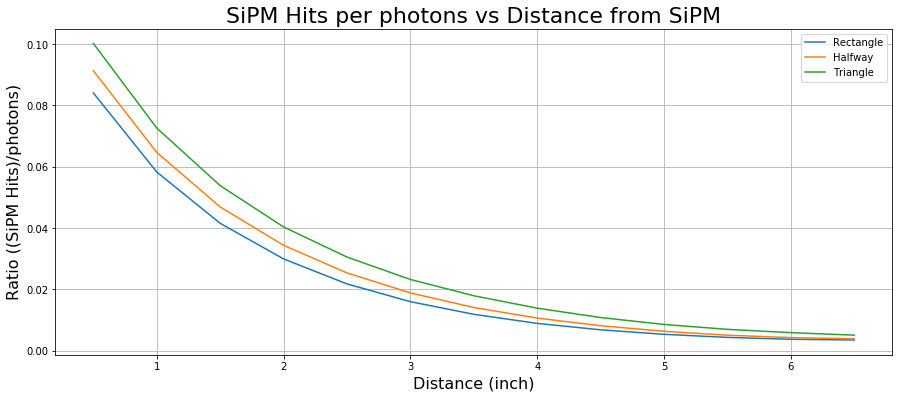

In [450]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('SiPM Hits per photons vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Ratio ((SiPM Hits)/photons)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,3], label =shapes[i])
    
legend()
show()

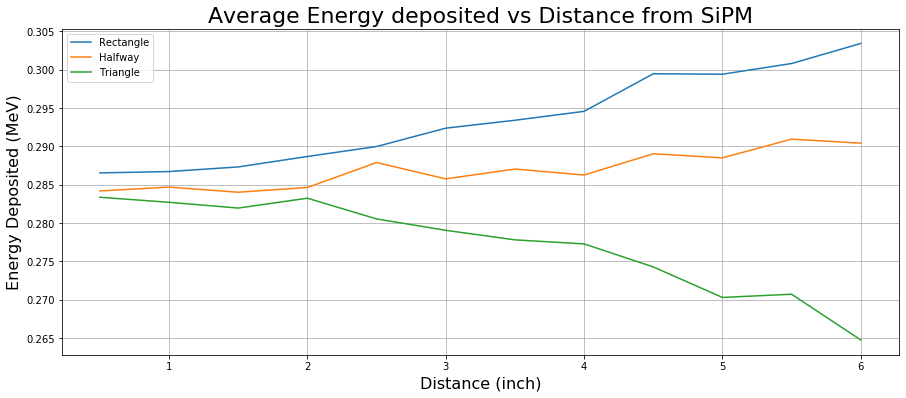

In [444]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Average Energy deposited vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Energy Deposited (MeV)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,0], label =shapes[i])
    
legend()
show()

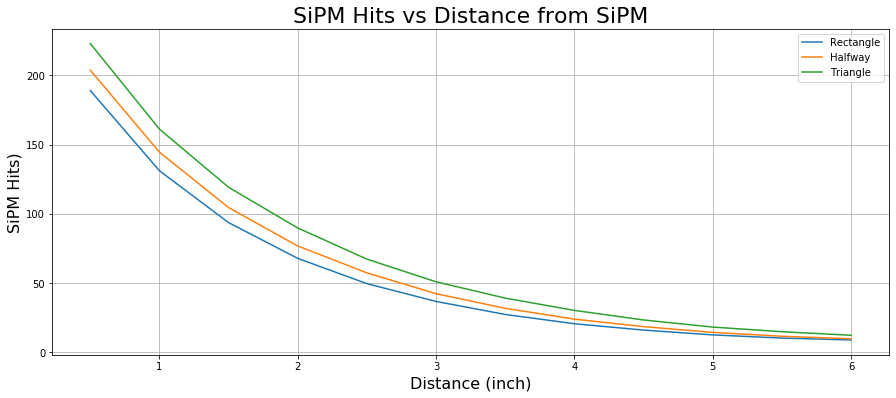

In [413]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('SiPM Hits vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('SiPM Hits)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,1], label =shapes[i])
    
legend()
show()

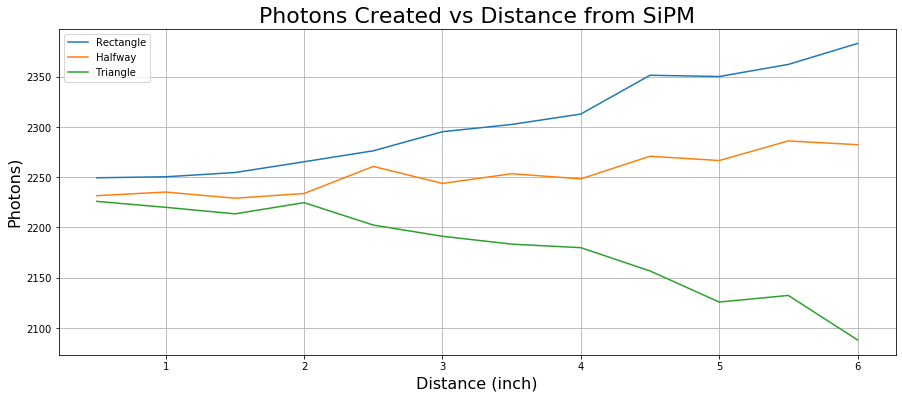

In [414]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Photons Created vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Photons)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,2], label =shapes[i])
    
legend()
show()

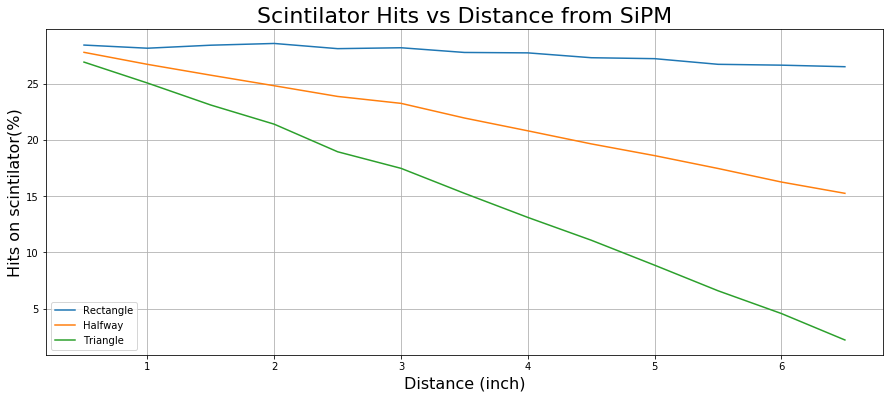

In [463]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Scintilator Hits vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Hits on scintilator(%)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,4]/1e3, label =shapes[i])
    
legend()
show()

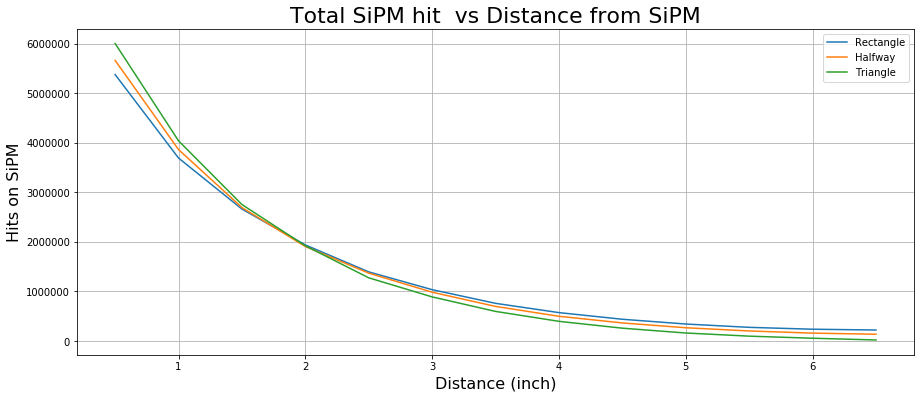

In [476]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Total SiPM hit  vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Hits on SiPM',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,5], label =shapes[i])
    
legend()
show()

In [335]:
# Rectangle to trianle shape parameters
b1 = np.arange(0,1.65,0.15) 
b2 = 1.5
h = 7
theta = arctan(b1/7)*180/pi
volume_cu_in = np.flip(0.5*(b1+b2)*h)
Distance = np.arange(-3,3,0.5)*2.54
Distance

array([-7.62, -6.35, -5.08, -3.81, -2.54, -1.27,  0.  ,  1.27,  2.54,
        3.81,  5.08,  6.35])

In [368]:
#Histograms
bins = 256
counts = np.zeros((4,bins,))
bcs = np.zeros((4,bins)) #bin centers
for i in range(4):
    be = np.linspace(min(data[:,i,0]), max(data[:,i,0]), bins+1)
    bc = be[:-1] + np.diff(be) / 2.
    count, _ = np.histogram(data[:,i,0], bins = bins)
    counts[i,:]= count
    bcs[i,:]= bc
